
# **Project: Investigate a Dataset (TMDb Movies Dataset):**
***
## Table of Contents
***
><ul>
><li><a href="#intro">Introduction</a></li>
><li><a href="#wrangling">Data Wrangling</a></li>
><li><a href="#eda">Exploratory Data Analysis</a></li>
><li><a href="#conclusions">Conclusions</a></li>
></ul>
***

<a id='intro'></a>
## **Introduction:**

In this project we will be looking at the TMDb Movies Dataset, and going throughout the process of wrangling, cleaning, and analyzing it's data to answer theses questions:

## **Questions:**
1. Which Movie has returned the highest and lowest revenues?
2. What kinds of features are associated with high revenue?
3. What are the profitable movie genres?
4. What was the year that has the most movies with the highest profit?


<a id='wrangling'></a>
## **Data Wrangling:**

Taking a look at the dataset and exploring it's structure and features to build a first intuition about the it, also identifying how we are going to proceed with cleaning the data and assessing it to be ready for analysis.



```
# This is formatted as code
```

### 1- Importing libraries and loading the data:
***

In [32]:
# Importing required modules for this project: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# Reading the data with pandas:
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")
# Displaying dataset head (First 5 rows) :
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 2- Checking the data consistency and cleanness:
***

In [34]:
# Getting info about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [35]:
# Getting each column type in the dataset:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [36]:
# Getting starting descriptive statistics using the describe method:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [37]:
# Getting the shape of the dataset:
df.shape

(10866, 21)

In [38]:
# Checking if there are duplicated values:
df.duplicated().sum()

1

In [39]:
# Getting the duplicated row index and printing it:
dup_index = df[df.duplicated()].index
df.iloc[dup_index]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [40]:
# Checking for null values:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [41]:
# Checking if there are zero values in the revenue column \
# as we are going to use it to calculate the profit:
df.query("revenue == 0")["revenue"].value_counts()

0    6016
Name: revenue, dtype: int64

In [42]:
# Checking if there are zero values in the budget column, \
# as we are going to use it to calculate the profit:
df.query("budget == 0")["budget"].value_counts()

0    5696
Name: budget, dtype: int64

In [43]:
# Checking the release date type:
df["release_date"].dtype

dtype('O')

# Data wrangling observations and findings:

- Date consists of **10866 rows** and **21 columns**
- Dataframe types (***Objects**, **Int64** and **floats64**)
- There are some date columns that will not be relevant to our analysis process which we will be removing in the cleaning process
- There is only one duplicated row in the dataset which we have identified at **index (2090)**
- There are **Null values** in the dateset but they exist in data columns which we will not be using or is not relevant to our analysis, so we will ignore them
- **revenue**, and **budget** has zero values that might effect our calculations.
- **release_date** is an object type, which we will have to change to datetime object to be used effectively in our analysis
- We are going to need a **profit** column to display how much each movie has made as a profit.


## Data Cleaning:

1. Removing these columns (**id**, **imdb_id**, **cast**, **director**, **homepage**, **keywords**, **overview**, **production_companies**, **budget_adj**, .**revenue_adj**, **popularity**), as they are irrelevant to answering our questions\analysis.
2. Removing the duplicated row.
3. Changing zero values in **revenue**, **budget** to Nulls and then dropping them.
4. Changing **release_date** from an object type to datetime.
5. Creating a **profit** column.

### 1- Removing irrelevant columns:
***

In [44]:
# Identifying columns that will not be relevant to our analysis:
irrelevant_columns = ["id", "imdb_id", "cast", "director", "homepage", "keywords", "overview", "production_companies", "budget_adj", "revenue_adj",
"tagline", "vote_average", "vote_count"]

In [45]:
# Importing DataFrame from pandas for type hinting
from pandas import DataFrame
# Creating a function to drop irrelevant columns for the analysis from the dataset. 
def drop_irr(df: DataFrame, irr_col: list) -> None:
    """Takes irrelevant columns as a list and drop them.

    Parameters
    ----------
    df : DataFrame
        _description_ : The dataframe to drop the columns from.
    irr_col : list
        _description_ : A list of columns names to drop from the data set.

    """
    # Dropping irrelevant columns for the analysis from the dataset.
    df.drop(irr_col, axis = 1, inplace = True)

    # Checking if columns were removed:
    for col in irr_col:
      # If any column in the dataset were found break out of the function and print it out.
      if col in df.columns:
        print(f"{col} NOT removed.")
        return
    # If all columns were removed print success message
    print(f"Removed irrelevant columns.")

# Calling the function
drop_irr(df, irrelevant_columns)

Removed irrelevant columns.


In [46]:
# Checking the dataset:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2015


### 2- Dropping duplicates:
***

In [47]:
# Dropping duplicates:
df.drop_duplicates(inplace = True)
# Checking:
if df.duplicated().sum() == 0:
  print("Removed all duplicates.")

Removed all duplicates.


### 3- Changing zero values in **revenue**, **budget** and **runtime** to Nulls and then dropping them:
***

In [48]:
column_names = ["revenue", "budget"]

def rmv_zeros(df: DataFrame, columns: list) -> None:
    """Takes in columns names and replaces any zero values with NAN then drop them.

    Parameters
    ----------
    df : DataFrame
        _description_ : The dataframe containing the columns.
    columns : list
        _description_ : A list of columns names in the dataframe.
    """
    # Replacing the '0' values with NAN
    df[columns] = df[columns].replace(0, np.NAN)

    # Looping over the columns list and checking for '0' values 
    for col in columns:
      zero_values =  df.query(f"{col} == 0").value_counts()

      if 0 not in zero_values:
        print(f"{col} have no 0 values")
    
    # Dropping NAN values from the dataset
    df.dropna(inplace = True)

# Calling the function
rmv_zeros(df, column_names)

revenue have no 0 values
budget have no 0 values


### 4• Changing **release_date** from an object type to datetime.
***

In [49]:
# Using pandas to_daytime method to convert the release date to datetime object:
df["release_date"] = pd.to_datetime(df["release_date"])

# Checking the changes:
df[["release_date"]].dtypes

release_date    datetime64[ns]
dtype: object

### 5- Creaating a profit column:
***

In [50]:
# Creating a profit columns:
profit_col = df["revenue"] - df["budget"]

# Inserting the profit column in the dataset as column index 3:
df.insert(3, "profit", profit_col)

# Showing the dataset hear
df.head(3)

,popularity,budget,revenue,profit,original_title,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


<a id='eda'></a>
# Exploratory Data Analysis
Now after cleaning our data it's ready for our analysis and exploration.


In [51]:
df.describe()

,popularity,budget,revenue,profit,runtime,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,7.048292e+07,109.220291,2001.261028
std,1.475162,4.220822e+07,1.765393e+08,1.506195e+08,19.922820,11.282575
min,0.001117,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,1960.000000
25%,0.462367,1.000000e+07,1.360003e+07,-1.321535e+06,95.000000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,2.002019e+07,106.000000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,8.170331e+07,119.000000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,2015.000000


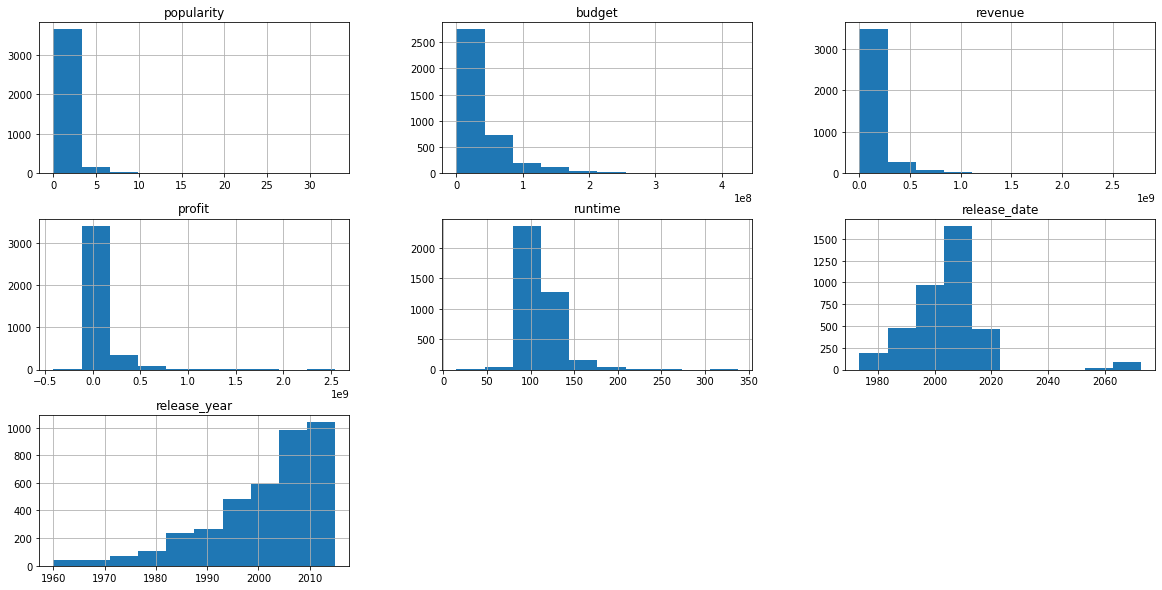

In [52]:
df.hist(figsize = (20, 10));

### Observations:

- Most movies was released between the years **1990** and **2020**, with a spike around **2010**.
- Runtime averages around **100**

### Research Question 1: Which Movie has returned the highest and lowest revenues?
***

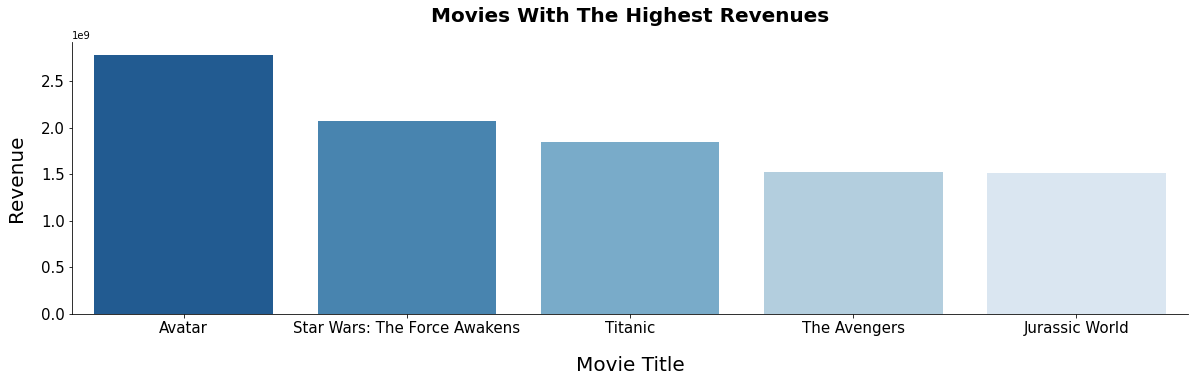

In [53]:
# Sorting the dataset by revenue in decending order to get the highest \
# revenue returned movie in the dataset:
highest_rev = df.sort_values(by = "revenue", ascending = False)

# Slicing the the first top 5 rows:
highest_rev = highest_rev[:5]


# ------- PLOTTING BAR GRAPH ------- #

# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize = (20, 5))

# Plotting the bar graph
plot = sns.barplot(x = highest_rev["original_title"], y = highest_rev["revenue"], palette = "Blues_r");

# Setting the plot title
plot.set_title("Movies With The Highest Revenues", fontsize = 20, fontweight = "bold", pad = 20)

# Setting the x-label
plot.set_xlabel("Movie Title", fontsize = 20, labelpad = 20)
# Setting the x-label
plot.set_ylabel("Revenue", fontsize = 20, labelpad = 15)

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine(top = True)

#### Observations:
- The movie **Avatar** has returned the highest revenue followed by **Star Wars: The Force Awakens**, **Titanic**, **The Avengers** and **Jurassic World**.

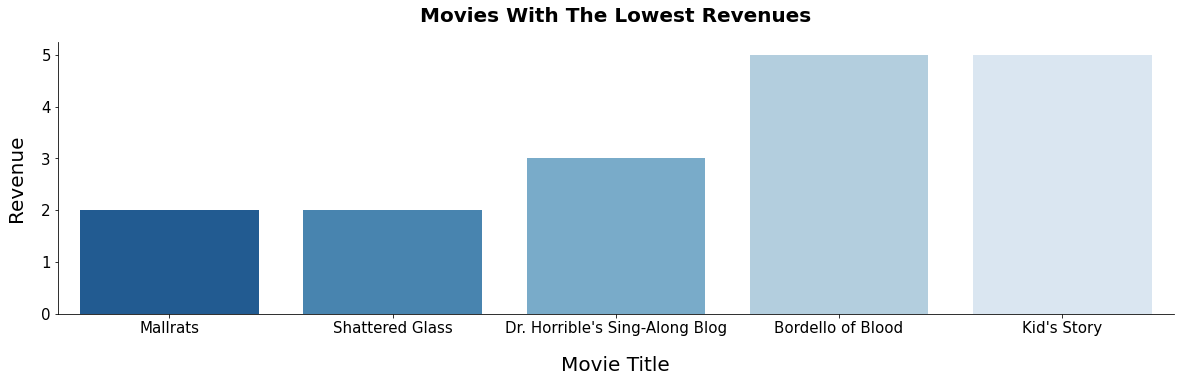

In [54]:
# Sorting the dataset by revenue in ascending order to get the lowest
# revenue returned movie in the dataset:
lowest_rev = df.sort_values(by = "revenue", ascending = True)

# Slicing the the first top 5 rows:
lowest_rev = lowest_rev[:5]


# ------- PLOTTING BAR GRAPH ------- #

# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize=(20, 5))

# Plotting the bar graph
plot = sns.barplot(x = lowest_rev["original_title"], y = lowest_rev["revenue"], palette = "Blues_r");

# Setting the plot title
plot.set_title("Movies With The Lowest Revenues", fontsize = 20, fontweight = "bold", pad = 20)

# Setting the x-label
plot.set_xlabel("Movie Title", fontsize = 20, labelpad = 20)
# Setting the x-label
plot.set_ylabel("Revenue", fontsize = 20, labelpad = 15)

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine(top = True)

#### Observations:
- The movie **Mallrats** has returned the lowest revenue followed by **Shattered Glass**, **Dr.Horrible's Sing-Along Blog**, **Kid's Story** and **Bordello of Blood**.

### Research Question 2: What kinds of features are associated with high revenue?
***

In [55]:
# Using corr() method to find the correlation between columns:
rev_corr = df.corr()
rev_corr

,popularity,budget,revenue,profit,runtime,release_year
popularity,1.000000,0.446987,0.615535,0.596201,0.215092,0.173278
budget,0.446987,1.000000,0.688556,0.526818,0.260977,0.268040
revenue,0.615535,0.688556,1.000000,0.979133,0.250298,0.139140
profit,0.596201,0.526818,0.979133,1.000000,0.220238,0.087971
runtime,0.215092,0.260977,0.250298,0.220238,1.000000,-0.112453
release_year,0.173278,0.268040,0.139140,0.087971,-0.112453,1.000000


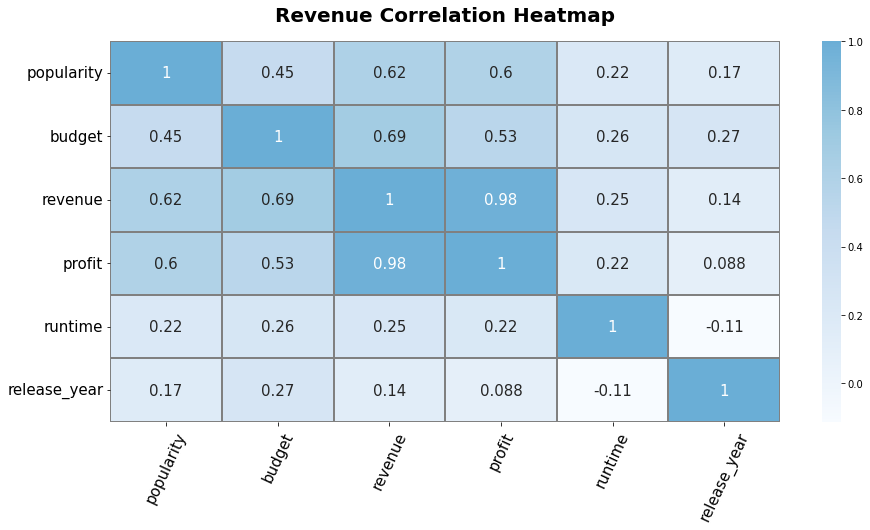

In [56]:
# Initiating the pyplot figure object and configuring the figure size
fig, ax = plt.subplots(1, figsize=(15, 7))

# Adding the figure Title and setting the font settings
plt.title("Revenue Correlation Heatmap", fontsize = 20, fontweight = "bold", pad = 20)

# Increasing the ticks font sizes
plt.xticks(fontsize = 15, rotation = 65)
plt.yticks(fontsize = 15)

# Calculating pairwise correlation of columns
corr = df.corr()  

# Plotting a heatmap 
sns.heatmap(
    rev_corr, 
    annot = True, 
    annot_kws = {"size": 15},
    cmap = "Blues", 
    linewidth = 2,
    linecolor = "gray",
    center = rev_corr.revenue.all()
    );

#### Observations:
- The heatmap shows that the features that are correlated with a movie having a high revenue are **popularity**, **budget** and **profit**. 

### Research Question 3: What was the year that has the most movies with the highest profit?
***

In [57]:
# Grouping the dataset by release year and getting the profit columns and adding all profit:
year_df = df.groupby(["release_year"])["profit"].sum()

# Reseting/giving the sorted dateset an index:
year_df = year_df.reset_index().sort_values(by = "profit", ascending = False)[:10]
year_df

,release_year,profit
55,2015,1.903215e+10
54,2014,1.667620e+10
52,2012,1.659685e+10
53,2013,1.578274e+10
51,2011,1.496669e+10
49,2009,1.406931e+10
50,2010,1.334122e+10
48,2008,1.184337e+10
47,2007,1.168610e+10
44,2004,9.822507e+09


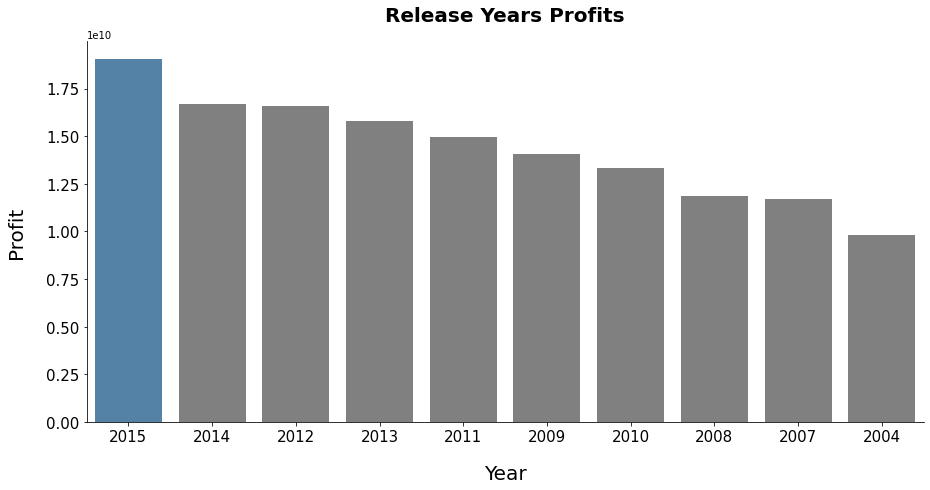

In [58]:
# ------- PLOTTING BAR GRAPH ------- #

# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize=(15, 7))

cols = ["steelblue" if x == max(year_df["profit"]) else "gray" for x in year_df["profit"]]

# Plotting a bar graph
plot = sns.barplot(
  x = year_df["release_year"],
  y = year_df["profit"],
  color = "gray",
  order = year_df["release_year"],
  palette = cols
);

# Setting the plot title
plot.set_title("Release Years Profits", fontsize = 20, fontweight = "bold", pad = 20)

# Setting the x-label
plot.set_xlabel("Year", fontsize = 20, labelpad = 20)
# Setting the x-label
plot.set_ylabel("Profit", fontsize = 20, labelpad = 20)

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine(top = True);

#### Observations:
- Year **2015** is the year that has the movies with the **highest profits**. 

### Research Question 4: What are the profitable movie genres?
***

In [59]:
# Getting the mean value of the profit column:
profit_mean = df["profit"].mean()

# Filtering the profit values that are greater than or equal the profit column mean: 
profitable_mv = df[ df["profit"] >= profit_mean ]

# Sorting the filtered values in a descending order to get the top profitable movies first: 
profitable_mv = profitable_mv.sort_values("profit", ascending = False)

# Dropping director, release_date and release_year columns:
profitable_mv = profitable_mv.drop(columns = ["release_date", "release_year"])

# Resetting the dataframe index:
profitable_mv = profitable_mv.reset_index()

# Dropping the index column:
profitable_mv.drop(columns = ["index"], inplace = True)

# Slicing only the first 20 profitable movies:
profitable_mv = profitable_mv[:20]

# Checking the dataframe:
profitable_mv.head()

,popularity,budget,revenue,profit,original_title,runtime,genres
0,9.432768,237000000.0,2.781506e+09,2.544506e+09,Avatar,162,Action|Adventure|Fantasy|Science Fiction
1,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy
2,4.355219,200000000.0,1.845034e+09,1.645034e+09,Titanic,194,Drama|Romance|Thriller
3,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller
4,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,137,Action|Crime|Thriller


In [60]:
# Slicing each movie genre to count out the most common ones in the top 20 profitable movies:
profitable_genres = profitable_mv["genres"].str.get_dummies()
profitable_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Science Fiction,Thriller
0,1,1,0,0,0,0,0,1,0,0,1,0
1,1,1,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,0,1
3,1,1,0,0,0,0,0,0,0,0,1,1
4,1,0,0,0,1,0,0,0,0,0,0,1


In [61]:
# Sorting the genres in a descending order and resetting their index:
profitable_genres_counts = profitable_genres.sum().sort_values(ascending = False).reset_index()
profitable_genres_counts.head()

,index,0
0,Adventure,15
1,Action,12
2,Science Fiction,8
3,Family,6
4,Fantasy,6


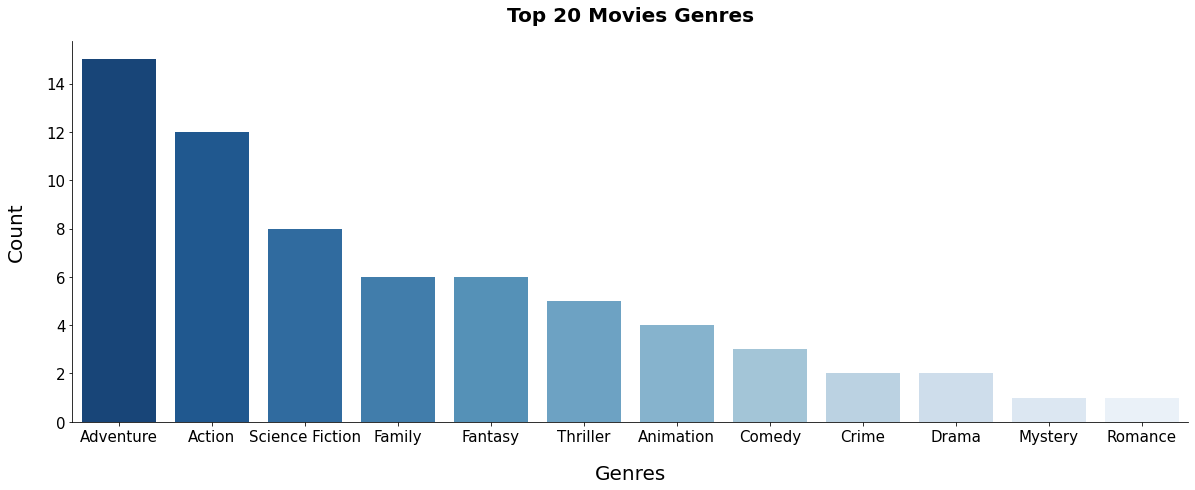

In [62]:
# Setting the figure size for this plot
fig, ax = plt.subplots(1, figsize=(20, 7))

# Plotting a bar graph
plot = sns.barplot(
  x = profitable_genres_counts["index"],
  y = profitable_genres_counts[0],
  palette = "Blues_r"
)

# Setting the plot title
plot.set_title("Top 20 Movies Genres", fontsize = 20, fontweight = "bold", pad = 20)

# Setting the x-label
plot.set_xlabel("Genres", fontsize = 20, labelpad = 20)
# Setting the x-label
plot.set_ylabel("Count", fontsize = 20, labelpad = 20)

# Increasing the x-ticks font size
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Removing plot spine and setting style
sns.despine(top = True);

#### Observations:
- Movie genres **Adventure**, **Action**, **Science Fiction** and **Family** seems to be the most popular in the top 20 movies. 

<a id='conclusions'></a>
## Conclusions:

- Avatar is the highest revenue returned movie.
- Mallrats is the lowest revenue returned movie.
- Popularity, budget and profit are the features that effect the movie's revenue the most.
- Release year 2015 is the year that has the most profitable movies released.

### • From analyzing the top 20 profitable movies, we concluded that in order for a movie to be profitable:

- It should have an average runtime of **136.65** Minutes.
- An average budget of **16,005,0000$**
- An average popularity score of **7.03671825**.
- Should be in these movie genres **Adventure**, **action**, **science-fiction**, and **family**.
